core           INFO 	Loading data for British Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '18'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '4', '1', '81', '27', '55', '18', '23', '14', '16', '2', '22', '24', '3', '77', '20', '31', '11', '10']


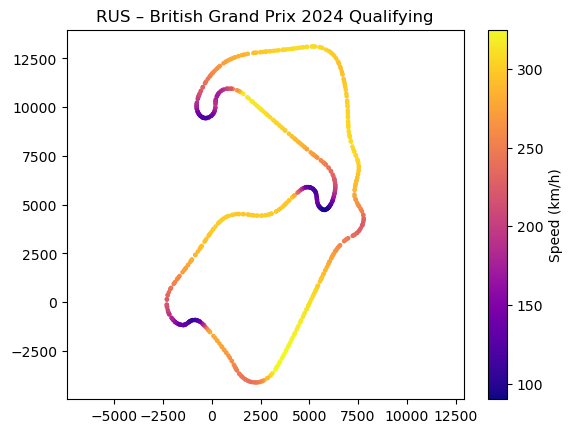

In [25]:
import os
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt

os.makedirs('f1_cache', exist_ok=True)
fastf1.Cache.enable_cache('f1_cache')

# To see other heatmaps for the other tracks, replace Monza with Silverstone or Miami
session = fastf1.get_session(2024, 'Silverstone', 'Q')
session.load()
lap = session.laps.pick_fastest()
tel = lap.get_car_data().add_distance()
pos = lap.get_pos_data()
merged = lap.get_telemetry()
plt.scatter(merged['X'], merged['Y'], c=merged['Speed'], cmap='plasma', s=5)
plt.axis('equal')
plt.title(f"{lap['Driver']} – {session.event['EventName']} 2024 Qualifying")
plt.colorbar(label='Speed (km/h)')
plt.show()


In [24]:
import fastf1
import pandas as pd
import os

os.makedirs('f1_cache', exist_ok=True)
fastf1.Cache.enable_cache('f1_cache')

session = fastf1.get_session(2024, 'Silverstone', 'Q')
session.load()
lap = session.laps.pick_fastest()

# High-frequency telemetry (distance + speed)
tel = lap.get_car_data().add_distance()
pos = lap.get_pos_data()

# Merge using timestamp alignment
merged = pd.merge_asof(
    tel.sort_values("Date"),
    pos.sort_values("Date"),
    on="Date",
    direction="nearest"
)

# Clean + save
data = merged[['X', 'Y', 'Speed']].dropna().rename(columns={'X': 'x', 'Y': 'y', 'Speed': 'speed'})
data.to_csv("silverstone_dense.csv", index=False)


core           INFO 	Loading data for British Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '18'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '4', '1', '81', '27', '55', '18', '23', '14', '16', '2', '22', '24', '3', '77', '20', '31', '11', '10']
